In [1]:
source("forest_class.R")
require("kernlab")
require("aricode")
require("mclust")

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: GIGrvg

Loading required package: gtools


Attaching package: ‘gtools’


The following object is masked from ‘package:igraph’:

    permute


Loading required package: RcppML

Loading required package: clue

Loading required package: kernlab

Loading required package: aricode

Loading required package: mclust

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



In [3]:
require("clusterSim")

n= 400



p<- 2
data<- shapes.two.moon(numObjects = n/2)

y<- data$data
true_membership<- data$clusters

num_concat = 10

# y<- y + rnorm(n*2, sd=0.0001)
true_membership<- c(true_membership,rep(1,num_concat))

sd = 0.3

y<-rbind(y, matrix(rnorm(num_concat*2,0,sd)+colMeans(y),ncol=2,byrow = TRUE))

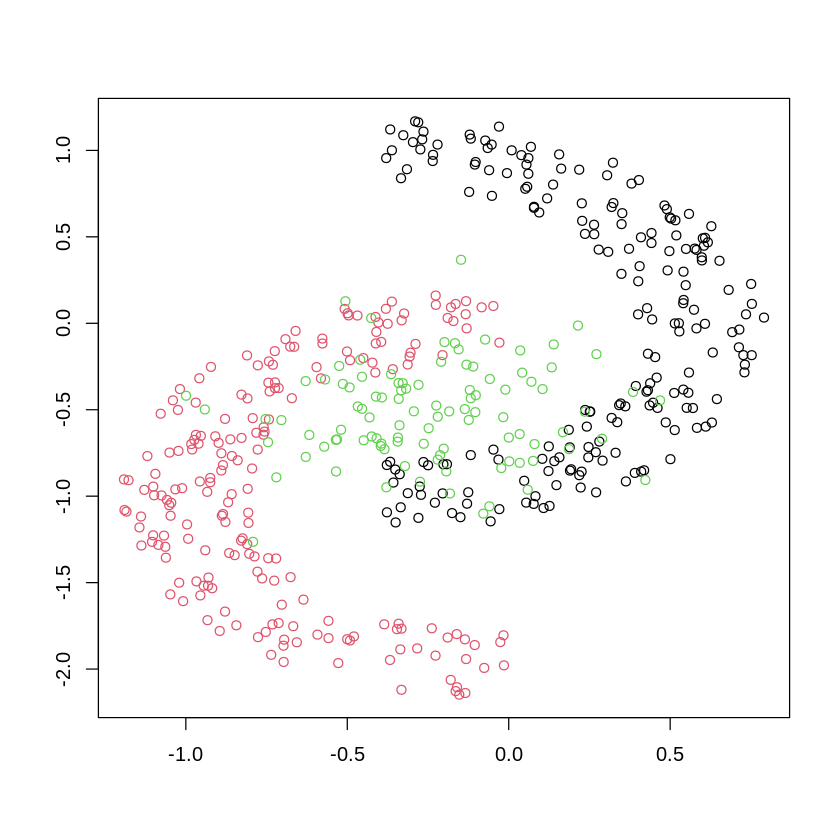

In [5]:

p<- 2
data<- shapes.two.moon(numObjects = n/2)

y<- data$data
true_membership<- data$clusters

num_concat = 100

# y<- y + rnorm(n*2, sd=0.0001)
true_membership<- c(true_membership,rep(3,num_concat))

sd = 0.3

y<-rbind(y, matrix(rnorm(num_concat*2,0,sd)+colMeans(y),ncol=2,byrow = TRUE))

plot(y[,1],y[,2], col=true_membership,xlab="",ylab="")



In [6]:
experiment<- function(num_concat = 10, sd = 0.1,n = 400, steps=100,burnin=50){




            K = 2
    
            p<- 2
            data<- shapes.two.moon(numObjects = n/2)

            y<- data$data
            true_membership<- data$clusters

            true_membership<- c(true_membership,rep(1,num_concat))

            y<-rbind(y, matrix(rnorm(num_concat*2,0,sd)+colMeans(y),ncol=2,byrow = TRUE))


            forest<- Forest$new()

            forest$init(y)
            forest$MCMC_run_single_graph(steps,burnin)

            trace_C<- forest$trace_C
            
    
            n = nrow(y)
            C_mat<- matrix(0,n,n)
    

            for(C in trace_C){
                C_mat = C_mat+ 1*outer(C,C,'==')
            }


            C_point_est<- matchAtoB(getPointEstC(C_mat,K),true_membership)

            accu<- clusteringAccu(C_point_est,true_membership)

            ari <- adjustedRandIndex(C_point_est,true_membership)

            nmi<- NMI(C_point_est,true_membership)
    
    
            c(accu,ari,nmi)
    }

In [ ]:
res1 <- sapply(c(1:10), function(i) experiment(num_concat = 10, sd = 0.1))
res2 <- sapply(c(1:10), function(i) experiment(num_concat = 100, sd = 0.1))
res3 <- sapply(c(1:10), function(i) experiment(num_concat = 200, sd = 0.1))

list_res<- list(res1,res2,res3)

# save(list_res,file="res_uq_vs_lcg_sd01.RDa")

In [7]:
experiment(num_concat = 100, sd = 0.1)

  |==================================================| 100%

[1] 0.9840000 0.9368346 0.8913436

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:kernlab’:

    alpha


Loading required package: reshape

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


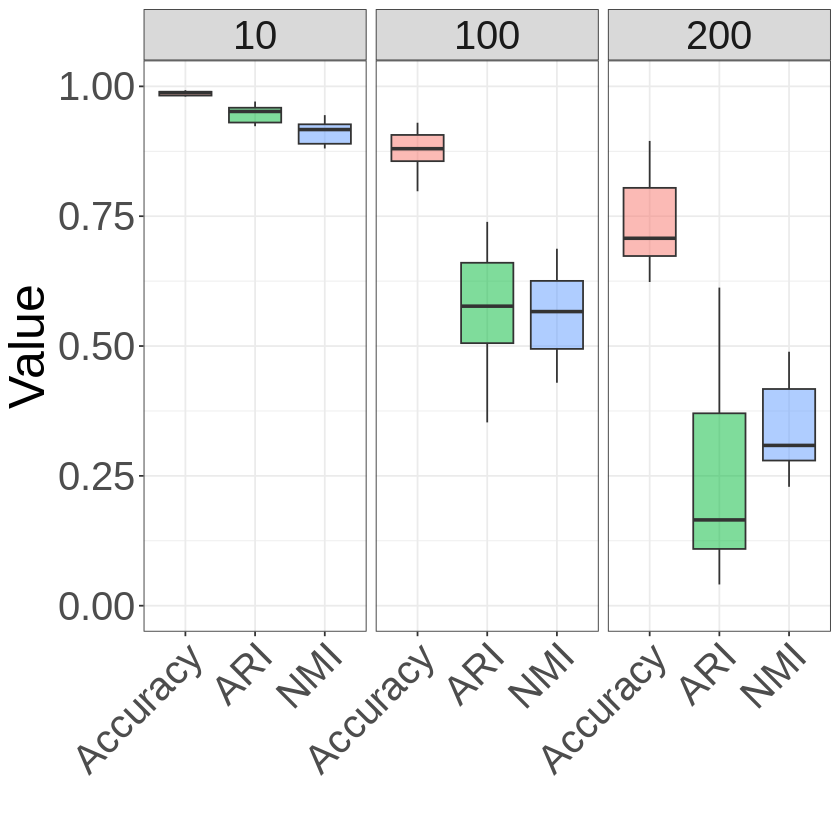

In [8]:
load("res_uq_vs_lcg_sd03.RDa")

require("ggplot2")
require("reshape")

prob_list <- c(10,100,200)


df<- data.frame()

for(k in 1:3){

    res<- t(list_res[[k]])

    colnames(res)<- c("Accuracy", "ARI", "NMI")
    
    df<- rbind(df, cbind(melt(res), prob_list[k]))
    # df<- rbind(df, )
}

colnames(df)<- c("index", "Score", "Value", "Prob1")
df$Prob1<- factor(df$Prob1, levels = c(10,100,200))

ggplot(df, aes(x = Score, y = Value, fill= Score)) +
facet_grid(~ Prob1) +  geom_boxplot(alpha = 0.5, outlier.shape = "")+
  xlab("") +
   ylab("Value")+theme_bw() + 
theme(text = element_text(size = 30),axis.text.x = element_text(angle = 45, hjust = 1),
      axis.title.x = element_text(vjust = 1, hjust = 9),
     legend.position = "none"
     )+ylim(0,1)
